# Basic Qubits, Introduction

Hello, Qubit!
This is a quantum circuit of 1 qubit and 1 bit:


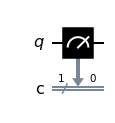

In [1]:
#Program 1.1 The first quantum program
from qiskit import QuantumCircuit
print("Hello, Qubit!")
qc = QuantumCircuit(1,1)
qc.measure([0], [0])
print("This is a quantum circuit of 1 qubit and 1 bit:")
qc.draw('mpl')

This is the quantum circuit of 5 qubits and 2 bits:


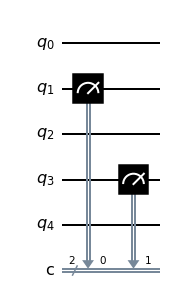

In [2]:
#Program 1.2 Design a quantum circuit with 5 qubits and 3 classical bits
from qiskit import QuantumCircuit
print("This is a quantum circuit of 5 qubits and 2 bits:")
qc = QuantumCircuit(5, 2)
qc.measure([1,3], [0,1])
qc.draw('mpl')

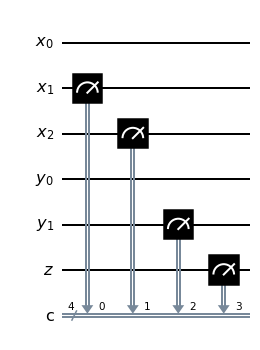

In [3]:
#Program 1.3 Name and label quantum bits and classical bits
from qiskit import QuantumRegister,ClassicalRegister,QuantumCircuit
qrx = QuantumRegister(3,'x')
qry = QuantumRegister(2,'y')
qrz = QuantumRegister(1,'z')
cr = ClassicalRegister(4,'c')
qc = QuantumCircuit(qrx,qry,qrz,cr)
qc.measure([qrx[1],qrx[2]], [cr[0],cr[1]]) 
qc.measure([4,5], [2,3])
qc.draw('mpl')

In [4]:
#Program 1.4 Transpile and execute quantum circuit on simulator
from qiskit import QuantumCircuit, transpile, execute
from qiskit.providers.aer import AerSimulator
sim = AerSimulator()
qc = QuantumCircuit(1, 1)
qc.measure([0], [0])
print(qc)
cqc = transpile(qc, sim)
job=execute(cqc, backend=sim, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print("Total counts for qubit states are:",counts)

     ┌─┐
  q: ┤M├
     └╥┘
c: 1/═╩═
      0 
Total counts for qubit states are: {'0': 1000}


In [5]:
#Program 1.5 Execute quantum circuit (program) on simulator
from qiskit import QuantumCircuit, execute
from qiskit.providers.aer import AerSimulator
sim = AerSimulator()
qc = QuantumCircuit(1, 1)
qc.measure([0], [0])
print(qc)
job=execute(qc, backend=sim, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print("Total counts for qubit states are:",counts)

     ┌─┐
  q: ┤M├
     └╥┘
c: 1/═╩═
      0 
Total counts for qubit states are: {'0': 1000}


In [6]:
#Program 1.6 Execute quantum circuit (program) on least busy quantum computer
from qiskit import QuantumCircuit, IBMQ, execute
from qiskit.providers.ibmq import least_busy 
from qiskit.tools.monitor import job_monitor 
qc = QuantumCircuit(1, 1)
qc.measure([0], [0])
print(qc)
IBMQ.save_account('5659b3d872ca97b9f94d75f411c8146d6a15501b0dcbad91f45d1ea1ff65081f939de4824f8632849b5d4eb87728ef549e0b7e2bc1a2014335a16adb33d546e2',overwrite=True)
IBMQ.load_account()
provider=IBMQ.get_provider(group='open')
print(provider)
qcomp = least_busy(provider.backends(simulator=False))
print("The least busy quantum computer is:",qcomp)
job=execute(qc, backend=qcomp, shots=1000)
job_monitor(job)
result = job.result()
counts = result.get_counts(qc)
print("Total counts for qubit states are:",counts)

     ┌─┐
  q: ┤M├
     └╥┘
c: 1/═╩═
      0 
<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>
The least busy quantum computer is: ibmq_quito
Job Status: job has successfully run
Total counts for qubit states are: {'0': 992, '1': 8}


In [7]:
#Program 1.7 Execute quantum circuit (program) on proper quantum computer
from qiskit import QuantumCircuit, IBMQ, execute
from qiskit.tools.monitor import job_monitor 
qc = QuantumCircuit(1, 1)
qc.measure([0], [0])
print(qc)
#IBMQ.save_account('......',overwrite=True)
#IBMQ.load_account()
provider = IBMQ.get_provider(group='open')
qcomp = provider.get_backend('ibmq_lima')
job=execute(qc, backend=qcomp, shots=1000)
job_monitor(job)
result = job.result()
counts = result.get_counts(qc)
print("Total counts for qubit states are:",counts)

     ┌─┐
  q: ┤M├
     └╥┘
c: 1/═╩═
      0 
Job Status: job has successfully run
Total counts for qubit states are: {'0': 997, '1': 3}
